In [345]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [346]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

# 1. Dataset Statistics

In [347]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [348]:
scipy.stats.describe(y)

DescribeResult(nobs=3065, minmax=(np.int64(0), np.int64(1)), mean=np.float64(0.39738988580750406), variance=np.float64(0.23954932085067235), skewness=np.float64(0.41936632478193103), kurtosis=np.float64(-1.824131885638896))

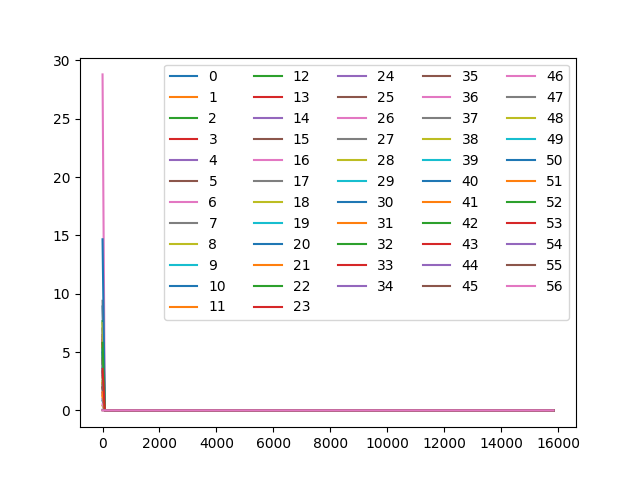

In [349]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

# First Observations
- there is very high spike around the interval [0, 1]
- the densities there are very high

In [350]:
import pandas as pd

df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
1,0.00,0.00,0.0,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
2,0.00,0.00,0.0,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.0,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.0,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0


# Observation
- the last 3 features are absolute features representing direct measurements -> this can be derived from the fact that they are not in the range of 0 and 1
- the first 54 features are relative features since they represent ratios from 0 to 1.

Text(0.5, 1.0, 'All relative features')

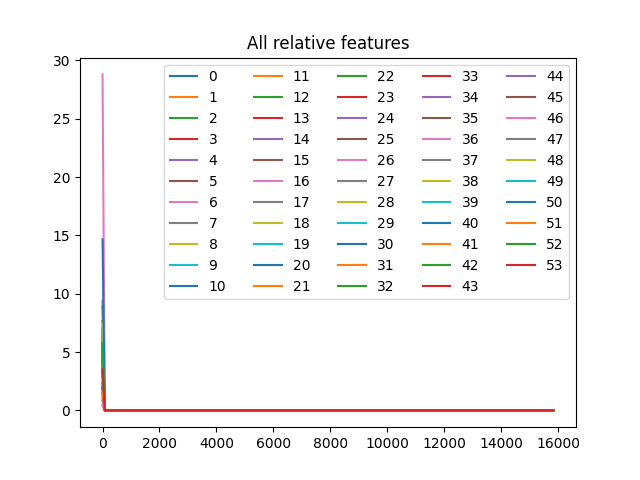

In [351]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('All relative features')

Text(0.5, 1.0, 'Absolute features only')

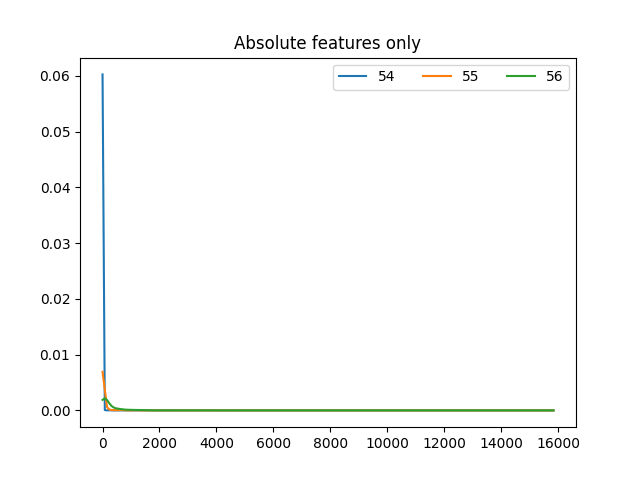

In [352]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3, D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('Absolute features only')

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 1')

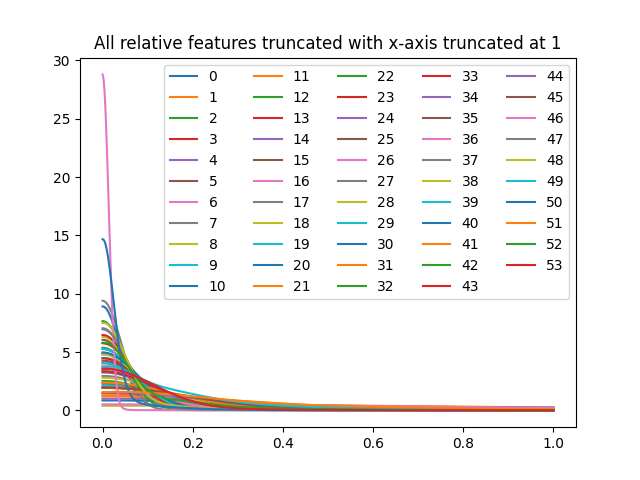

In [353]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 1, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 1')

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 0.5')

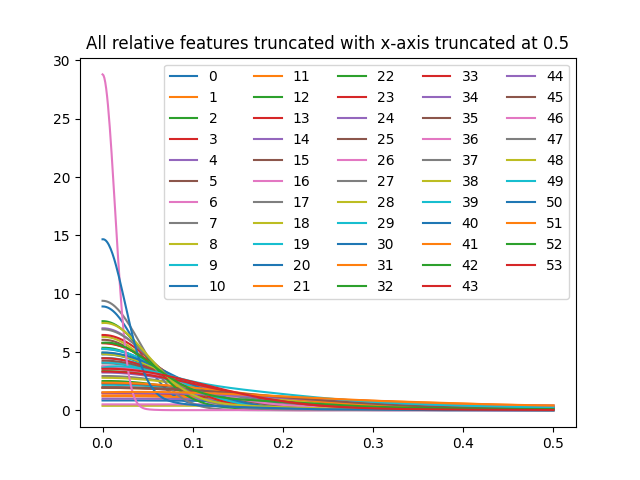

In [354]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 0.5, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 0.5')

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 0.1')

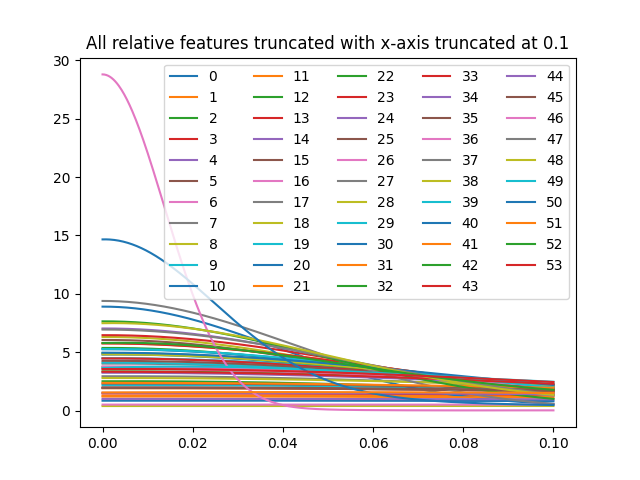

In [355]:
# this plots is not really helpful; go now explore further
# YOUR CODE HERE
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 0.1, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 0.1')

In [356]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
Xz = (X - np.mean(X, axis=0))/np.std(X, axis=0)
Xtestz = (Xtest - X.mean(axis=0))/X.std(axis=0)

In [357]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
np.mean(Xz, axis=0)  # should be all 0
np.var(Xz, axis=0)  # should be all 1
np.mean(Xtestz, axis=0)  # what do you get here?
np.var(Xtestz, axis=0)

np.sum(Xz ** 3)  # should be: 1925261.15

np.float64(1925261.1560010156)

Text(0.5, 1.0, 'normalised data')

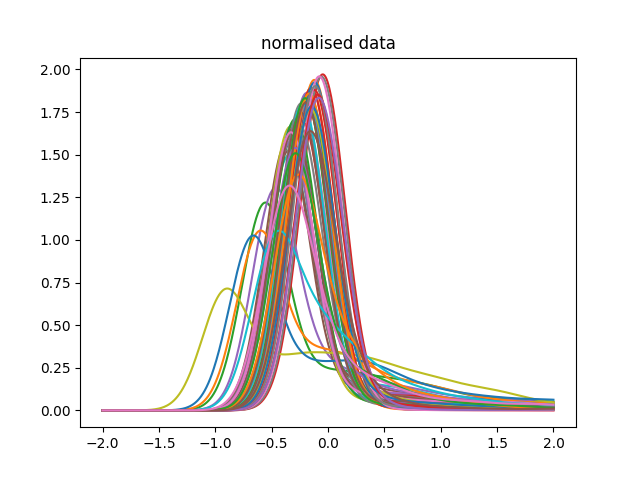

In [358]:
# Explore the normalized data
# YOUR CODE HERE
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(-2, 2, 500) # changing the x axis scale: most of the density is between 0 and 0.4
for j in range(D):
    plt.plot(xs, densities[j](xs)) # or features[j]
#plt.legend(ncol=5)
plt.title('normalised data')

Text(0.5, 1.0, 'normalised data on absolute features')

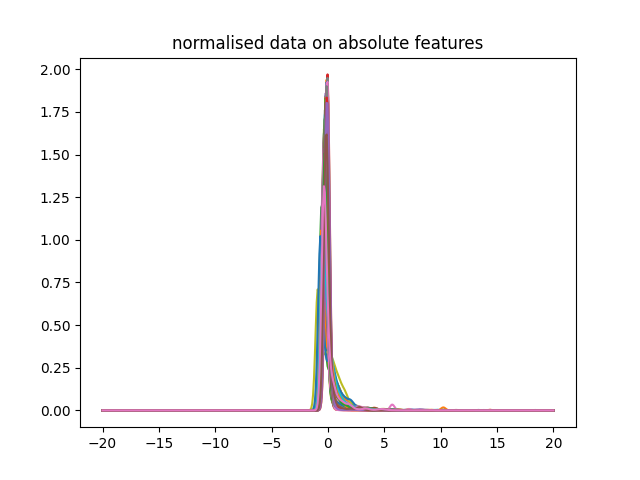

In [359]:
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(-20, 20, 500) 
for j in range(D):
    plt.plot(xs, densities[j](xs)) # or features[j]
#plt.legend(ncol=5)
plt.title('normalised data on absolute features')

# 2. Maximum Likelihood Estimation

## Helper functions

In [360]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [361]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    # YOUR CODE HERE
    return (1/(1+np.exp(-x)))

In [362]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[np.float64(0.5), array([0.26894142, 0.5       , 0.73105858])]

In [363]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    # YOUR CODE HERE
    return np.log(sigma(x))

In [364]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[np.float64(-0.6931471805599453),
 array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [365]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    # YOUR CODE HERE
    return np.sum(y * logsigma(np.dot(X, w)) + ((1-y) * logsigma(np.dot(X, -w))))

In [366]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

np.float64(-47066.64166782577)

In [367]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    # YOUR CODE HERE
    return np.dot((y - sigma(np.dot(X,w))), X)

In [368]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [369]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [370]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        # YOUR CODE HERE
        return -l(y, X, w)

    def update(w, eps):
        # YOUR CODE HERE
        return w + eps * dl(y, X, w)
    return (objective, update)

In [371]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[np.float64(47066.64166782577),
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+0

In [372]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

[1207.52879695 1052.48868141  957.27518607  899.60997121  882.90386968
 1017.08330643  840.76034728  805.64944488  822.10755293  746.3765272
  735.80344825  729.77972027  724.46654724  719.40754937  714.56420006
  709.93150537  705.51372394  701.32058598  697.3727873   693.72796682
  690.59050906  688.61403656  688.6072475   690.85370503  679.96673843
  678.6487248   677.44697804  676.2920139   675.18187078  674.11982964
  673.11430886  672.17678494  671.33439451  670.65641635  670.39652863
  671.3415612   668.93209505  668.37772376  668.02744976  667.72041793
  667.4326423   667.15852567  666.89741211  666.64968828  666.41666269
  666.20069827  666.00829537  665.85764639  665.8118935   666.0675226
  665.42402519  665.29018471  665.2044092   665.1276083   665.05382418
  664.98172455  664.91100022  664.84156821  664.77342578  664.70660983
  664.64126645  664.57784782  664.51791173  664.46689882  664.44636868]


Text(0.5, 1.0, 'ez_gd')

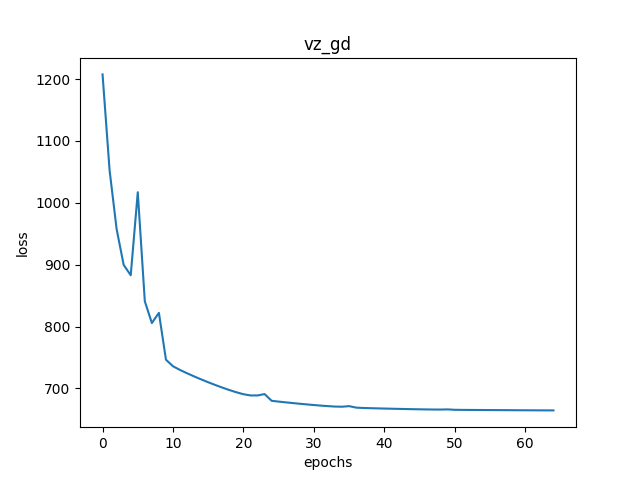

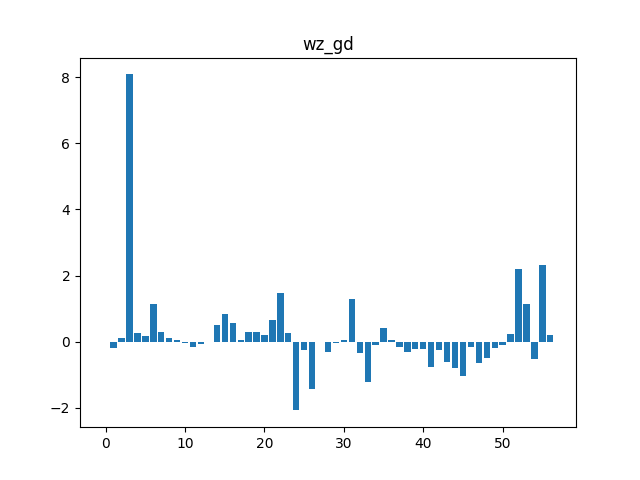

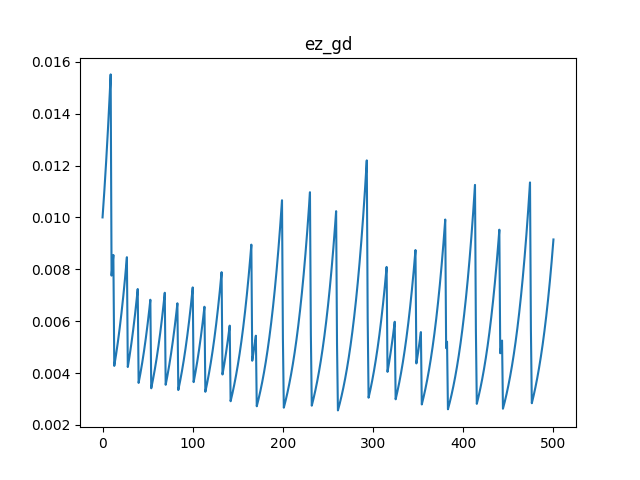

In [373]:
# look at how gradient descent made progess
# YOUR CODE HERE
print(vz_gd[5:70])
nextplot()
plt.plot(vz_gd[5:70])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('vz_gd')

nextplot()
plt.bar(range(0,57), wz_gd)
plt.title('wz_gd')

nextplot()
plt.plot(ez_gd)
plt.title('ez_gd')

## 2d Stochastic gradient descent

In [374]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    # YOUR CODE HERE
    temp = np.arange(0,len(X))
    np.random.shuffle(temp)
    for i in temp:
        w =  w + eps * (y[i] - sigma(np.dot(w,X[i,]))) * X[i,]
    return w

In [375]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [376]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        # YOUR CODE HERE
        return -l(y, X, w)
    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [377]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[np.float64(40.864973045695095),
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+

In [378]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   958.654, eps=0.010500000
Epoch   2: f=   786.651, eps=0.011025000
Epoch   3: f=   738.739, eps=0.011576250
Epoch   4: f=   718.166, eps=0.012155063
Epoch   5: f=   709.413, eps=0.012762816
Epoch   6: f=   696.048, eps=0.013400956
Epoch   7: f=   701.674, eps=0.006700478
Epoch   8: f=   686.406, eps=0.007035502
Epoch   9: f=   683.692, eps=0.007387277
Epoch  10: f=   684.500, eps=0.003693639
Epoch  11: f=   679.969, eps=0.003878321
Epoch  12: f=   679.230, eps=0.004072237
Epoch  13: f=   678.181, eps=0.004275848
Epoch  14: f=   677.570, eps=0.004489641
Epoch  15: f=   676.763, eps=0.004714123
Epoch  16: f=   675.966, eps=0.004949829
Epoch  17: f=   676.625, eps=0.002474914
Epoch  18: f=   675.185, eps=0.002598660
Epoch  19: f=   674.531, eps=0.002728593
Epoch  20: f=   674.095, eps=0.002865023
Epoch  21: f=   673.692, eps=0.003008274
Epoch  22: f=   673.359, eps=0.003158688
Epoch  23: f=   673.075, eps=0.003316622
Epoch  24: f=   

## 2e Compare GD and SGD

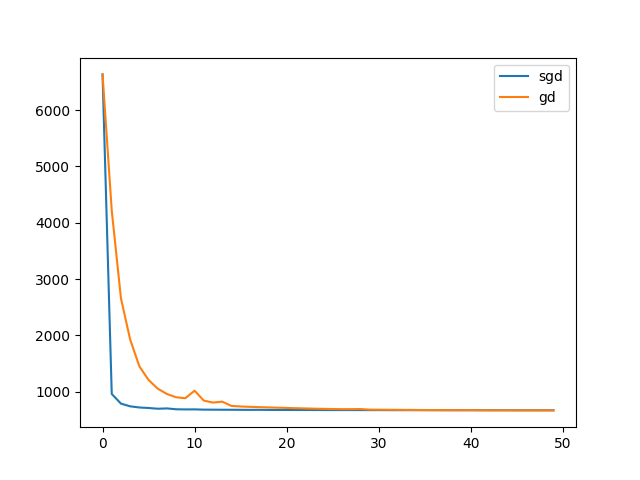

In [379]:
# YOUR CODE HERE
nextplot()
plt.plot(vz_sgd[0:50], label='sgd')
plt.plot(vz_gd[0:50], label='gd')
plt.legend()

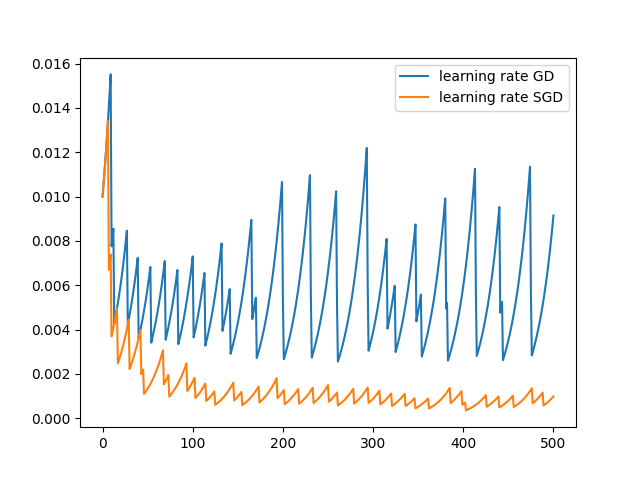

In [380]:
nextplot()
plt.plot(ez_gd, label='learning rate GD')
plt.plot(ez_sgd, label='learning rate SGD')
plt.legend()

# 3 Prediction

In [381]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    return sigma(np.dot(Xtest, w))

def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    return np.round(predict(Xtest, w))

In [382]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[887  54]
 [ 71 524]]


In [383]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



Text(0, 0.5, 'Precision')

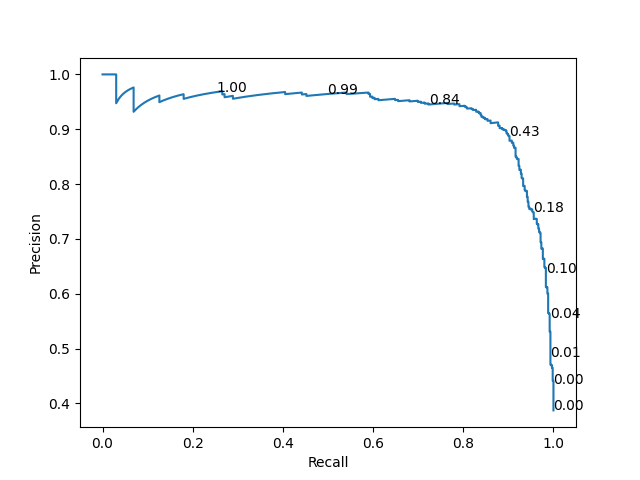

In [384]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

In [385]:
# Explore which features are considered important
# YOUR CODE HERE
gd_interpretable = {}
sgd_interpretable = {}
for i in (np.argsort(wz_gd)):
    gd_interpretable[features[i]] = np.exp(wz_gd[i])
    sgd_interpretable[features[i]] = np.exp(wz_sgd[i])

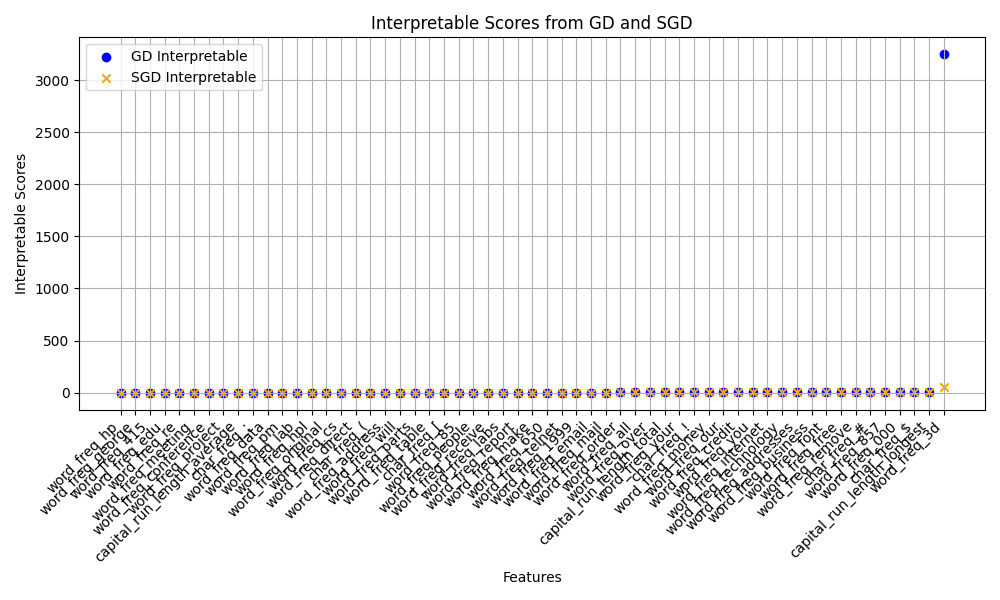

In [386]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming gd_interpretable and sgd_interpretable are already populated
features = list(gd_interpretable.keys())

# Extracting values for plotting
gd_values = [gd_interpretable[feature] for feature in features]
sgd_values = [sgd_interpretable[feature] for feature in features]

# Setting up the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for GD values
plt.scatter(features, gd_values, color='blue', label='GD Interpretable', marker='o')
# Scatter plot for SGD values
plt.scatter(features, sgd_values, color='orange', label='SGD Interpretable', marker='x')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Interpretable Scores')
plt.title('Interpretable Scores from GD and SGD')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [387]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    # YOUR CODE HERE
    return np.subtract(l(y, X, w), np.dot((lambda_/2), (numpy.linalg.norm(w))**2))

In [388]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[np.float64(-47066.64166782577), np.float64(-47312.62381068291)]

In [389]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE
    return np.subtract(dl(y, X, w), np.dot(lambda_, w))

In [390]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [391]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE
    def objective(w):
        return -l_l2(y, X, w, lambda_)
    
    def update(w, eps):
        return w + eps * dl_l2(y, X, w, lambda_)
    
    return (objective, update)

In [392]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

## 4b Effect of Prior

In [393]:
# YOUR CODE HERE
lam = [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 100, 200, 500]
results = dict()
for la in lam: 
    numpy.random.seed(0)
    w0 = np.random.normal(size=D)
    results[str(la)] = optimize(gd_l2(y, Xz, la), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

In [411]:
results

{'0': (array([-8.86805803e-03, -1.87711722e-01,  1.21527679e-01,  8.08625721e+00,
          2.59086182e-01,  1.81011961e-01,  1.15333583e+00,  2.90298799e-01,
          1.13527420e-01,  6.60449223e-02, -4.68398587e-02, -1.65669222e-01,
         -6.53149090e-02, -1.09479222e-02,  4.94021994e-01,  8.43700154e-01,
          5.63710277e-01,  5.46097770e-02,  2.89015689e-01,  2.84882797e-01,
          2.17373273e-01,  6.64971958e-01,  1.46174692e+00,  2.54294549e-01,
         -2.07767632e+00, -2.64575174e-01, -1.41614626e+00, -1.47368318e-03,
         -3.06163147e-01, -3.12258163e-02,  4.18300416e-02,  1.28949980e+00,
         -3.28686051e-01, -1.22486766e+00, -8.94396839e-02,  4.03419808e-01,
          4.58896319e-02, -1.52073801e-01, -3.18849236e-01, -2.15088329e-01,
         -2.17999766e-01, -7.68176094e-01, -2.41103469e-01, -6.14325300e-01,
         -7.98221834e-01, -1.05010623e+00, -1.49903381e-01, -6.40578227e-01,
         -5.06152873e-01, -2.01326929e-01, -1.08442215e-01,  2.37141619

In [412]:
train_nll = {}
for k, v in results.items(): 
    print("lambda " + k +  ": " + str(v[1][-1]))
    train_nll[k] = v[1][-1]

lambda 0: 655.4134964699458
lambda 0.01: 656.1869767255793
lambda 0.1: 661.3584589394449
lambda 0.5: 674.1008281100459
lambda 1: 682.8492956819675
lambda 2: 695.3995518029758
lambda 3: 705.5283790137129
lambda 4: 714.3804990993458
lambda 5: 722.3720587338807
lambda 10: 754.8524204027968
lambda 20: 801.9128109439285
lambda 100: 988.511839602703
lambda 200: 1108.9460399053746
lambda 500: 1304.3834102975852


In [397]:
train_nll

{'0': np.float64(655.4134964699458),
 '0.01': np.float64(656.1869767255793),
 '0.1': np.float64(661.3584589394449),
 '0.5': np.float64(674.1008281100459),
 '1': np.float64(682.8492956819675),
 '2': np.float64(695.3995518029758),
 '3': np.float64(705.5283790137129),
 '4': np.float64(714.3804990993458),
 '5': np.float64(722.3720587338807),
 '10': np.float64(754.8524204027968),
 '20': np.float64(801.9128109439285),
 '100': np.float64(988.511839602703),
 '200': np.float64(1108.9460399053746),
 '500': np.float64(1304.3834102975852)}

/tmp/ipykernel_10897/3178920996.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


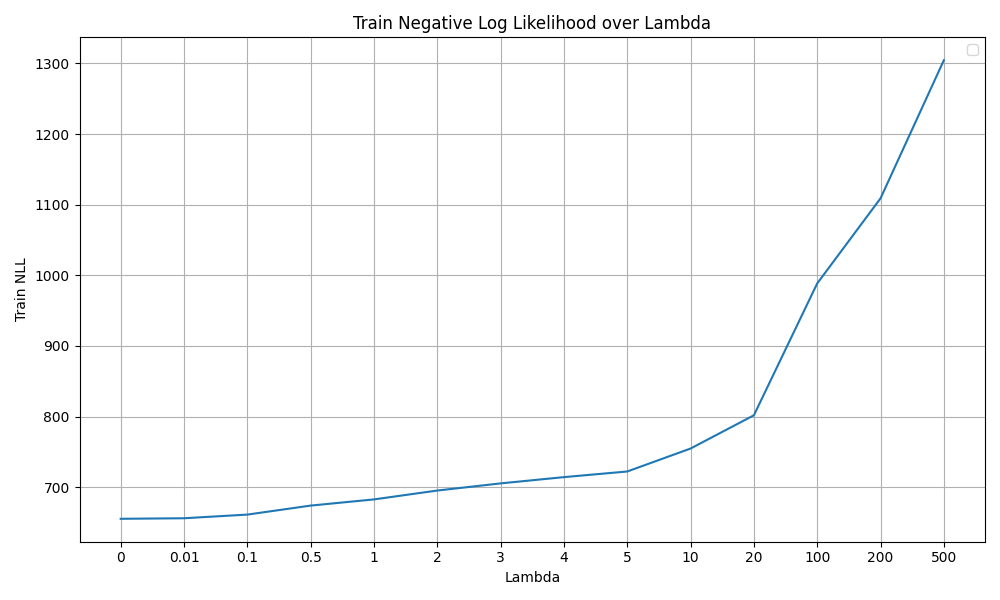

In [410]:
# Assuming gd_interpretable and sgd_interpretable are already populated
lambdas = list(train_nll.keys())

# Extracting values for plotting
train_nll_values = [train_nll[lam] for lam in lambdas]
# Setting up the scatter plot
plt.figure(figsize=(10, 6))

plt.plot(lambdas, train_nll_values)

# Adding labels and title
plt.xlabel('Lambda')
plt.ylabel('Train NLL')
plt.title('Train Negative Log Likelihood over Lambda')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
test_nll
for la in lam: 
    numpy.random.seed(0)
    w0 = np.random.normal(size=D)
    results[str(la)] = optimize(gd_l2(y, Xz, la), w0, nepochs=500)

In [396]:
test_nll = {}
for 

SyntaxError: invalid syntax (2648842428.py, line 2)

In [418]:
# accuracy
acc = {}
for la in lam: 
    yh = predict(Xtestz, results[str(la)][0])
    yp = classify(Xtestz, results[str(la)][0])
    metrics = sklearn.metrics.classification_report(ytest, yp, output_dict=True)
    acc[la] = metrics['accuracy']

/tmp/ipykernel_10897/1909171388.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


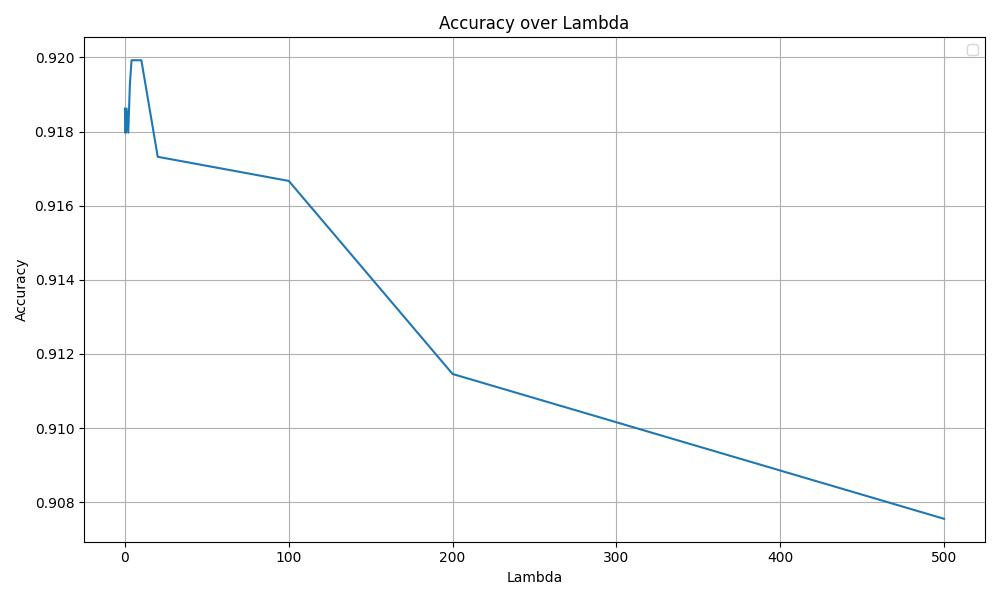

In [419]:
# Assuming gd_interpretable and sgd_interpretable are already populated
lambdas = list(acc.keys())

# Extracting values for plotting
accuracies = [acc[lam] for lam in lambdas]
# Setting up the scatter plot
plt.figure(figsize=(10, 6))

plt.plot(lambdas, accuracies)

# Adding labels and title
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy over Lambda')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## 4c Composition of Weight Vector

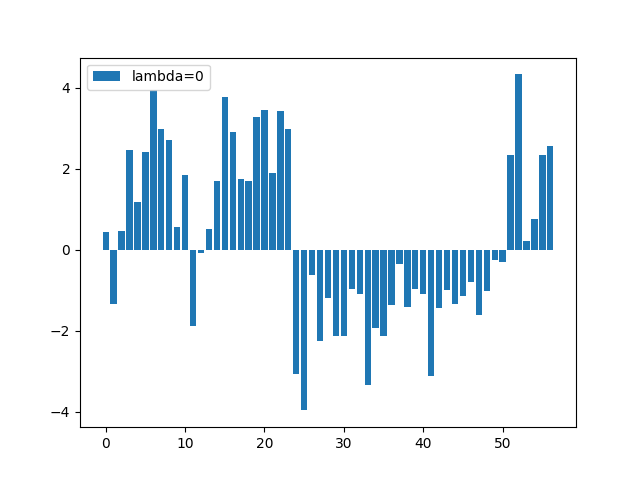

In [283]:
# YOUR CODE HERE
nextplot()
plt.bar(range(D),results['0'][0], label='lambda=0')
plt.legend()

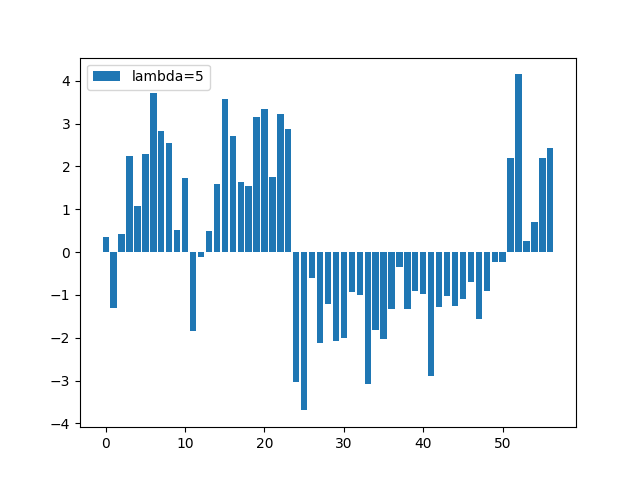

In [284]:
nextplot()
plt.bar(range(D),results['5'][0], label='lambda=5')
plt.legend()

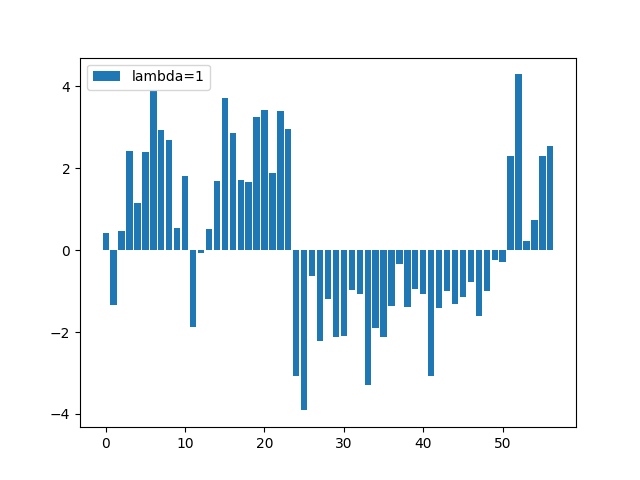

In [285]:
nextplot()
plt.bar(range(D),results['1'][0], label='lambda=1')
plt.legend()

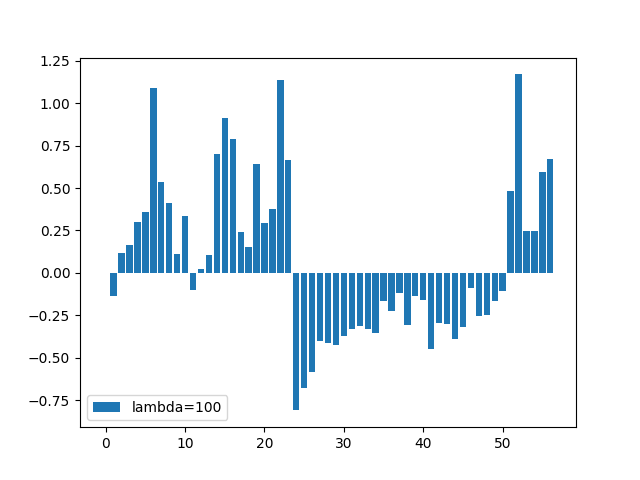

In [286]:
nextplot()
plt.bar(range(D),results['100'][0], label='lambda=100')
plt.legend()

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [287]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [288]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)

/tmp/ipykernel_10897/2194961090.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out)


Epoch   0: f=  2190.867, eps=       nan
Epoch   1: f=   863.782, eps=       nan
Epoch   2: f=   765.047, eps=       nan
Epoch   3: f=   730.643, eps=       nan
Epoch   4: f=   711.290, eps=       nan
Epoch   5: f=   700.965, eps=       nan
Epoch   6: f=   694.305, eps=       nan
Epoch   7: f=   688.729, eps=       nan
Epoch   8: f=   685.647, eps=       nan
Epoch   9: f=   681.029, eps=       nan
Epoch  10: f=   678.869, eps=       nan
Epoch  11: f=   676.551, eps=       nan
Epoch  12: f=   675.629, eps=       nan
Epoch  13: f=   673.418, eps=       nan
Epoch  14: f=   673.100, eps=       nan
Epoch  15: f=   671.311, eps=       nan
Epoch  16: f=   669.916, eps=       nan
Epoch  17: f=   669.679, eps=       nan
Epoch  18: f=   668.095, eps=       nan
Epoch  19: f=   667.293, eps=       nan
Epoch  20: f=   666.922, eps=       nan
Epoch  21: f=   667.016, eps=       nan
Epoch  22: f=   665.172, eps=       nan
Epoch  23: f=   664.804, eps=       nan
Epoch  24: f=   665.183, eps=       nan
